In [17]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'16',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2ce66dbb-541c-490b-87fc-afb3f8a20c21',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [5]:
type(data)

dict

In [54]:
import pandas as pd

# Expands the columns
pd.set_option('display.max_rows', None)

In [19]:
# Makes the data pretty in a dataframe
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11636,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974229e+07,1.974229e+07,False,NaN,1,NaN,NaN,None,2024-08-20T00:36:00.000Z,60542.020210,2.614356e+10,39.3479,1.911523,3.511274,1.532281,-9.810184,-6.647326,-13.696623,1.195238e+12,56.0949,1.271382e+12,None,2024-08-20T00:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
1,1027,Ethereum,ETH,ethereum,9223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202865e+08,1.202865e+08,True,NaN,2,NaN,NaN,None,2024-08-20T00:35:00.000Z,2666.359432,1.198843e+10,25.1856,1.249269,1.945334,-1.709040,-24.290005,-23.943370,-29.639007,3.207271e+11,15.0524,3.207271e+11,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
2,825,Tether USDt,USDT,tether,94561,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.168868e+11,1.180584e+11,True,NaN,3,NaN,NaN,None,2024-08-20T00:35:00.000Z,1.000241,4.691411e+10,29.2697,-0.014000,-0.005168,-0.002981,-0.040451,0.070726,0.035463,1.169150e+11,5.4871,1.180869e+11,None,2024-08-20T00:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-19 21:37:48.537858
3,1839,BNB,BNB,bnb,2211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459360e+08,1.459360e+08,False,NaN,4,NaN,NaN,None,2024-08-20T00:35:00.000Z,568.926373,1.748412e+09,18.9023,1.507492,7.231759,9.323429,-4.478936,-2.693012,-8.286764,8.302686e+10,3.9086,8.302686e+10,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
4,5426,Solana,SOL,solana,719,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.662078e+08,5.825696e+08,True,NaN,5,NaN,NaN,None,2024-08-20T00:35:00.000Z,146.639444,2.075756e+09,7.6956,1.555628,2.946349,-0.002300,-15.542917,9.906656,-17.821537,6.836445e+10,3.2085,8.542769e+10,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
5,3408,USDC,USDC,usd-coin,21564,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.492117e+10,3.483406e+10,False,NaN,6,NaN,NaN,None,2024-08-20T00:35:00.000Z,0.999928,4.851228e+09,49.9297,-0.016263,-0.012853,-0.001496,-0.013916,-0.017288,-0.010171,3.491865e+10,1.6371,3.483154e+10,None,2024-08-20T00:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-19 21:37:48.537858
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,None,2024-08-20T00:36:00.000Z,0.604937,1.601112e+09,143.2794,1.065833,7.462384,6.060482,1.674566,24.005958,12.828684,3.394488e+10,1.5931,6.049369e+10,None,2024-08-20T00:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
7,11419,Toncoin,TON,toncoin,514,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.522391e+09,5.110571e+09,True,NaN,8,3.414167e+09,2.351424e+10,None,2024-08-20T00:35:00.000Z,6.887255,3.993727e+08,12.5573,0.937764,-0.158573,9.866879,-5.232200,-3.335503,8.246690,1.737235e+10,0.8153,3.519781e+10,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
8,74,Dogecoin,DOGE,dogecoin,1038,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...

In [58]:
def api_runner():
    global df # makes accessing the variable global
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'16',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2ce66dbb-541c-490b-87fc-afb3f8a20c21',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])

    # Export a csv
    if not os.path.isfile(r'C:\Users\AD Vale do Sol\Documents\Gab\Freecodecamp\Data Analyst\Portfolio\Python\Automated Crypto Website API Pull\API.csv'):
        df.to_csv(r'C:\Users\AD Vale do Sol\Documents\Gab\Freecodecamp\Data Analyst\Portfolio\Python\Automated Crypto Website API Pull\API.csv', header='column_names')
    else:
        # 'a' = append
        df.to_csv(r'C:\Users\AD Vale do Sol\Documents\Gab\Freecodecamp\Data Analyst\Portfolio\Python\Automated Crypto Website API Pull\API.csv', mode='a', header=False)

In [60]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed!')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed!
API Runner Completed!


KeyboardInterrupt: 

In [ ]:
df7 = pd.read_csv(r'C:\Users\AD Vale do Sol\Documents\Gab\Freecodecamp\Data Analyst\Portfolio\Python\Automated Crypto Website API Pull\API.csv')
df7

In [56]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11636,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974229e+07,1.974229e+07,False,NaN,1,NaN,NaN,None,2024-08-20T00:36:00.000Z,60542.020210,2.614356e+10,39.3479,1.911523,3.511274,1.532281,-9.810184,-6.647326,-13.696623,1.195238e+12,56.0949,1.271382e+12,None,2024-08-20T00:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
1,1027,Ethereum,ETH,ethereum,9223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202865e+08,1.202865e+08,True,NaN,2,NaN,NaN,None,2024-08-20T00:35:00.000Z,2666.359432,1.198843e+10,25.1856,1.249269,1.945334,-1.709040,-24.290005,-23.943370,-29.639007,3.207271e+11,15.0524,3.207271e+11,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
2,825,Tether USDt,USDT,tether,94561,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.168868e+11,1.180584e+11,True,NaN,3,NaN,NaN,None,2024-08-20T00:35:00.000Z,1.000241,4.691411e+10,29.2697,-0.014000,-0.005168,-0.002981,-0.040451,0.070726,0.035463,1.169150e+11,5.4871,1.180869e+11,None,2024-08-20T00:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-19 21:37:48.537858
3,1839,BNB,BNB,bnb,2211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459360e+08,1.459360e+08,False,NaN,4,NaN,NaN,None,2024-08-20T00:35:00.000Z,568.926373,1.748412e+09,18.9023,1.507492,7.231759,9.323429,-4.478936,-2.693012,-8.286764,8.302686e+10,3.9086,8.302686e+10,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
4,5426,Solana,SOL,solana,719,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.662078e+08,5.825696e+08,True,NaN,5,NaN,NaN,None,2024-08-20T00:35:00.000Z,146.639444,2.075756e+09,7.6956,1.555628,2.946349,-0.002300,-15.542917,9.906656,-17.821537,6.836445e+10,3.2085,8.542769e+10,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
5,3408,USDC,USDC,usd-coin,21564,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.492117e+10,3.483406e+10,False,NaN,6,NaN,NaN,None,2024-08-20T00:35:00.000Z,0.999928,4.851228e+09,49.9297,-0.016263,-0.012853,-0.001496,-0.013916,-0.017288,-0.010171,3.491865e+10,1.6371,3.483154e+10,None,2024-08-20T00:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-19 21:37:48.537858
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,None,2024-08-20T00:36:00.000Z,0.604937,1.601112e+09,143.2794,1.065833,7.462384,6.060482,1.674566,24.005958,12.828684,3.394488e+10,1.5931,6.049369e+10,None,2024-08-20T00:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
7,11419,Toncoin,TON,toncoin,514,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.522391e+09,5.110571e+09,True,NaN,8,3.414167e+09,2.351424e+10,None,2024-08-20T00:35:00.000Z,6.887255,3.993727e+08,12.5573,0.937764,-0.158573,9.866879,-5.232200,-3.335503,8.246690,1.737235e+10,0.8153,3.519781e+10,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
8,74,Dogecoin,DOGE,dogecoin,1038,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...

In [63]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [65]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11636,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19742290.00000,19742290.00000,False,NaN,1,NaN,NaN,None,2024-08-20T00:36:00.000Z,60542.02021,26143562188.83047,39.34790,1.91152,3.51127,1.53228,-9.81018,-6.64733,-13.69662,1195238120167.02246,56.09490,1271382424405.04004,None,2024-08-20T00:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
1,1027,Ethereum,ETH,ethereum,9223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120286511.61579,120286511.61579,True,NaN,2,NaN,NaN,None,2024-08-20T00:35:00.000Z,2666.35943,11988431683.76624,25.18560,1.24927,1.94533,-1.70904,-24.29000,-23.94337,-29.63901,320727074740.58411,15.05240,320727074740.58002,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
2,825,Tether USDt,USDT,tether,94561,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116886835208.02866,118058419916.51601,True,NaN,3,NaN,NaN,None,2024-08-20T00:35:00.000Z,1.00024,46914105619.49873,29.26970,-0.01400,-0.00517,-0.00298,-0.04045,0.07073,0.03546,116915039369.93300,5.48710,118086906775.48000,None,2024-08-20T00:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-19 21:37:48.537858
3,1839,BNB,BNB,bnb,2211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936033.76022,145936033.76022,False,NaN,4,NaN,NaN,None,2024-08-20T00:35:00.000Z,568.92637,1748411670.40491,18.90230,1.50749,7.23176,9.32343,-4.47894,-2.69301,-8.28676,83026858342.54297,3.90860,83026858342.53999,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
4,5426,Solana,SOL,solana,719,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466207759.74946,582569637.34659,True,NaN,5,NaN,NaN,None,2024-08-20T00:35:00.000Z,146.63944,2075755823.59695,7.69560,1.55563,2.94635,-0.00230,-15.54292,9.90666,-17.82154,68364446447.05848,3.20850,85427687423.02000,None,2024-08-20T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
5,3408,USDC,USDC,usd-coin,21564,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34921173170.26858,34834061535.60529,False,NaN,6,NaN,NaN,None,2024-08-20T00:35:00.000Z,0.99993,4851228252.82421,49.92970,-0.01626,-0.01285,-0.00150,-0.01392,-0.01729,-0.01017,34918647677.18776,1.63710,34831542342.42000,None,2024-08-20T00:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-19 21:37:48.537858
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-20T00:36:00.000Z,0.60494,1601112161.83853,143.27940,1.06583,7.46238,6.06048,1.67457,24.00596,12.82868,33944875727.04744,1.59310,60493694275.98000,None,2024-08-20T00:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-19 21:37:48.537858
7,11419,Toncoin,TON,toncoin,514,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2522390752.17731,5110571020.32243,True,NaN,8,3414166606.00000,23514237423.44584,None,2024-08-20T00:35:00.000Z,6.88726,399372716.21550,12.55730,0.93776,-0.15857,9.86688,-5.23220,-3.33550,8.24669,17372349350.83932,0.81530,35197807901.37000,None,2024-08-20T

In [71]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.57367,3.23757,1.14475,-9.92870,-6.67013,-13.84294
Ethereum,0.83711,1.50043,-2.17627,-24.34073,-24.11087,-29.79592
Tether USDt,-0.00148,0.02342,0.01652,-0.01623,0.09732,0.05248
BNB,1.21784,6.61043,8.93341,-4.66332,-3.02997,-8.58184
Solana,1.65688,2.70502,0.02117,-15.43312,9.83368,-17.92029
USDC,-0.00583,-0.00013,0.00789,-0.00314,0.00390,0.00154
XRP,0.72152,7.13162,5.73094,1.90155,23.63144,12.87959
Toncoin,0.77096,-0.92832,9.73056,-5.41148,-3.58587,8.49716
Dogecoin,1.66318,3.06938,-4.97221,-22.55791,-16.88030,-39.81191


In [73]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      1.57367
              quote.USD.percent_change_24h     3.23757
              quote.USD.percent_change_7d      1.14475
              quote.USD.percent_change_30d    -9.92870
              quote.USD.percent_change_60d    -6.67013
              quote.USD.percent_change_90d   -13.84294
Ethereum      quote.USD.percent_change_1h      0.83711
              quote.USD.percent_change_24h     1.50043
              quote.USD.percent_change_7d     -2.17627
              quote.USD.percent_change_30d   -24.34073
              quote.USD.percent_change_60d   -24.11087
              quote.USD.percent_change_90d   -29.79592
Tether USDt   quote.USD.percent_change_1h     -0.00148
              quote.USD.percent_change_24h     0.02342
              quote.USD.percent_change_7d      0.01652
              quote.USD.percent_change_30d    -0.01623
              quote.USD.percent_change_60d     0.09732
              quote.US

In [81]:
type(df4)

pandas.core.series.Series

In [83]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    1.57367
             quote.USD.percent_change_24h   3.23757
             quote.USD.percent_change_7d    1.14475
             quote.USD.percent_change_30d  -9.92870
             quote.USD.percent_change_60d  -6.67013
             quote.USD.percent_change_90d -13.84294
Ethereum     quote.USD.percent_change_1h    0.83711
             quote.USD.percent_change_24h   1.50043
             quote.USD.percent_change_7d   -2.17627
             quote.USD.percent_change_30d -24.34073
             quote.USD.percent_change_60d -24.11087
             quote.USD.percent_change_90d -29.79592
Tether USDt  quote.USD.percent_change_1h   -0.00148
             quote.USD.percent_change_24h   0.02342
             quote.USD.percent_change_7d    0.01652
             quote.USD.percent_change_30d  -0.01623
             quote.USD.percent_change_60d   0.09732
             quote.USD.percent_change_90d   0.05248
BNB          quote.USD.percent_change_1h    1.21784
             quote.USD.percent_change_24h   6.61043
             quote.USD.percent_change_7d    8.93341
             quote.USD.percent_change_30d  -4.66332
             quote.USD.percent_change_60d  -3.02997
             quote.USD.percent_change_90d  -8.58184
Solana       quote.USD.percent_change_1h    1.65688
             quote.USD.percent_change_24h   2.70502
             quote.USD.percent_change_7d    0.02117
             quote.USD.percent_change_30d -15.43312
             quote.USD.percent_change_60d   9.83368
             quote.USD.percent_change_90d -17.92029
USDC         quote.USD.percent_change_1h   -0.00583
             quote.USD.percent_change_24h  -0.00013
             quote.USD.percent_change_7d    0.00789
             quote.USD.percent_change_30d  -0.00314
             quote.USD.percent_change_60d   0.00390
             quote.USD.percent_change_90d   0.00154
XRP          quote.USD.percent_change_1h    0.72152
             quote.USD.percent_change_24h   7.13162
             quote.USD.percent_change_7d    5.73094
             quote.USD.percent_change_30d   1.90155
             quote.USD.percent_change_60d  23.63144
             quote.USD.percent_change_90d  12.87959
Toncoin      quote.USD.percent_change_1h    0.77096
             quote.USD.percent_change_24h  -0.92832
             quote.USD.percent_change_7d    9.73056
             quote.USD.percent_change_30d  -5.41148
             quote.USD.percent_change_60d  -3.58587
             quote.USD.percent_change_90d   8.49716
Dogecoin     quote.USD.percent_change_1h    1.66318
             quote.USD.percent_change_24h   3.06938
             quote.USD.percent_change_7d   -4.97221
             quote.USD.percent_change_30d -22.55791
             quote.USD.percent_change_60d -16.88030
             quote.USD.percent_change_90d -39.81191
TRON         quote.USD.percent_change_1h    0.10244
             quote.USD.percent_change_24h   6.00292
             quote.USD.percent_change_7d   13.19630
             quote.USD.percent_change_30d   6.28397
             quote.USD.percent_change_60d  23.01280
             quote.USD.percent_change_90d  15.84362
Cardano      quote.USD.percent_change_1h    1.31938
             quote.USD.percent_change_24h   1.94075
             quote.USD.percent_change_7d    0.25930
             quote.USD.percent_change_30d -21.83854
             quote.USD.percent_change_60d -10.97143
             quote.USD.percent_change_90d -30.86092
Avalanche    quote.USD.percent_change_1h    1.29366
             quote.USD.percent_change_24h   3.56688
             quote.USD.percent_change_7d    0.95615
             quote.USD.percent_change_30d -25.88762
             quote.USD.percent_change_60d -21.74000
             quote.USD.percent_change_90d -47.80797
Shiba Inu    quote.USD.percent_change_1h    1.51551
             quote.USD.percent_change_24h   2.45961
             quote.USD.percent_change_7d   -2.95619
             quote.USD.percent_change_30d

In [93]:
type(df5)

df5.count()

values    96
dtype: int64

In [103]:
index = pd.Index(range(96))

# df6 = df5.set_index(index) -> Set then reset
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.57367
1,Bitcoin,quote.USD.percent_change_24h,3.23757
2,Bitcoin,quote.USD.percent_change_7d,1.14475
3,Bitcoin,quote.USD.percent_change_30d,-9.92870
4,Bitcoin,quote.USD.percent_change_60d,-6.67013
5,Bitcoin,quote.USD.percent_change_90d,-13.84294
6,Ethereum,quote.USD.percent_change_1h,0.83711
7,Ethereum,quote.USD.percent_change_24h,1.50043
8,Ethereum,quote.USD.percent_change_7d,-2.17627
9,Ethereum,quote.USD.percent_change_30d,-24.34073


In [107]:
df8 = df6.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.57367
1,Bitcoin,quote.USD.percent_change_24h,3.23757
2,Bitcoin,quote.USD.percent_change_7d,1.14475
3,Bitcoin,quote.USD.percent_change_30d,-9.92870
4,Bitcoin,quote.USD.percent_change_60d,-6.67013
5,Bitcoin,quote.USD.percent_change_90d,-13.84294
6,Ethereum,quote.USD.percent_change_1h,0.83711
7,Ethereum,quote.USD.percent_change_24h,1.50043
8,Ethereum,quote.USD.percent_change_7d,-2.17627
9,Ethereum,quote.USD.percent_change_30d,-24.34073


In [197]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,1.57367
1,Bitcoin,24h,3.23757
2,Bitcoin,7d,1.14475
3,Bitcoin,30d,-9.92870
4,Bitcoin,60d,-6.67013
5,Bitcoin,90d,-13.84294
6,Ethereum,1h,0.83711
7,Ethereum,24h,1.50043
8,Ethereum,7d,-2.17627
9,Ethereum,30d,-24.34073


In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

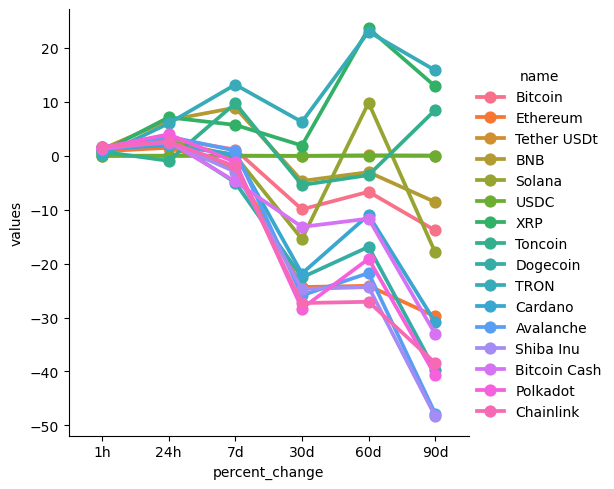

In [199]:
sns.catplot(data=df8, kind='point', hue='name', x='percent_change', y='values')

In [225]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,60542.02021,2024-08-19 21:37:48.537858
0,Bitcoin,60295.74140,2024-08-19 21:53:37.826328
0,Bitcoin,60345.44742,2024-08-19 21:54:38.131892
0,Bitcoin,60414.24888,2024-08-19 21:55:38.396388
0,Bitcoin,60414.24888,2024-08-19 21:56:38.662239
0,Bitcoin,60410.16167,2024-08-19 21:57:38.909066
0,Bitcoin,60515.19360,2024-08-19 22:18:04.050813
0,Bitcoin,60515.19360,2024-08-19 22:19:04.705787


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

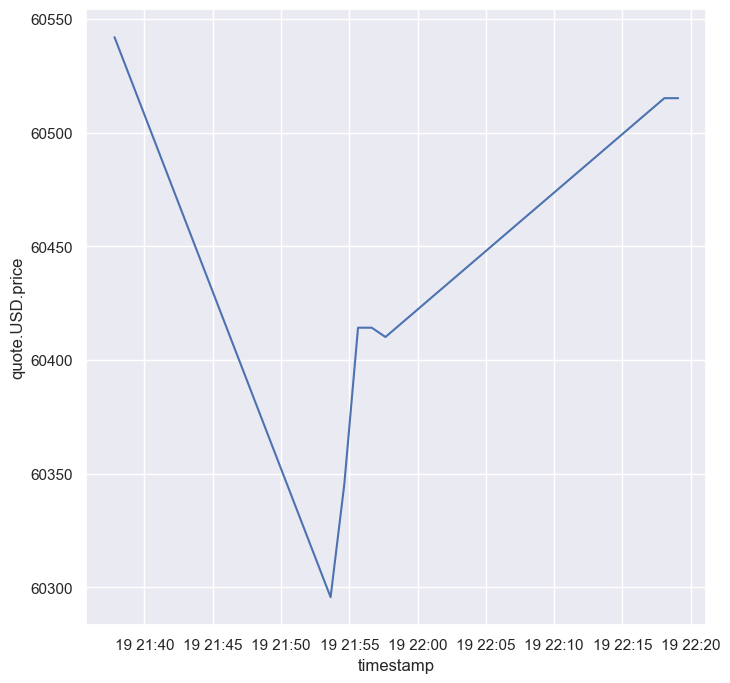

In [307]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,8))

sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)